In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [4]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings('ignore')

# Imputing with KNNImputer
from sklearn.impute import KNNImputer

In [5]:
df = pd.read_csv('C:/Users/Daelon/Desktop/Временные ряды/home_date_miss_values.csv', sep=';')
df['date'] = pd.to_datetime(df['date'])
df = df[df.date > pd.to_datetime('2022-05-30')]
df

,date,value
731,2022-05-31,31183.7
732,2022-06-01,29328.6
733,2022-06-02,29572.8
734,2022-06-03,29255.0
735,2022-06-04,29450.1
...,...,...
1091,2023-05-26,26338.0
1092,2023-05-27,26554.8
1093,2023-05-28,26788.7
1094,2023-05-29,27550.0


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 731 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   value   353 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.6 KB


In [7]:
df.describe()

,value
count,353.000000
mean,21839.537677
std,4040.851138
min,15470.500000
25%,18937.300000
50%,20957.000000
75%,24210.800000
max,31183.700000


In [8]:
df.value

731     31183.7
732     29328.6
733     29572.8
734     29255.0
735     29450.1
         ...   
1091    26338.0
1092    26554.8
1093    26788.7
1094    27550.0
1095    27559.8
Name: value, Length: 365, dtype: float64

In [9]:
df = df.ffill()
df

,date,value
731,2022-05-31,31183.7
732,2022-06-01,29328.6
733,2022-06-02,29572.8
734,2022-06-03,29255.0
735,2022-06-04,29450.1
...,...,...
1091,2023-05-26,26338.0
1092,2023-05-27,26554.8
1093,2023-05-28,26788.7
1094,2023-05-29,27550.0


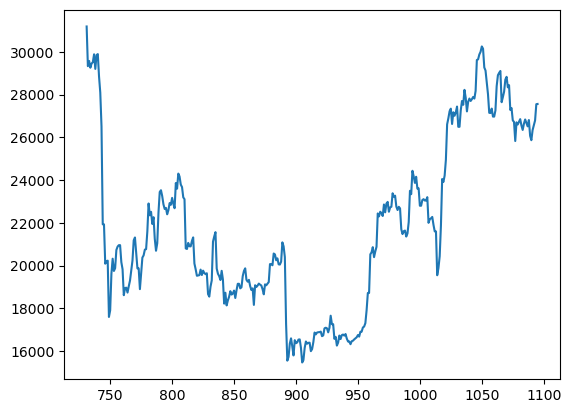

In [10]:
plt.plot(df['value'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 731 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   value   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.6 KB


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 731 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   value   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.6 KB


In [13]:
train_df = df[df.date < pd.to_datetime('2023-05-01')]
test_df = df[df.date >= pd.to_datetime('2023-05-01')]

In [14]:
train_df.shape

(335, 2)

In [15]:
test_df.shape

(30, 2)

In [22]:
# Moving Avarage
AR = AutoReg(train_df.value.values, lags=15)
AR_model = AR.fit()

In [23]:
AR_model.predict(start=len(train_df),
                 end=len(train_df) + len(test_df)-1)

array([28965.73376764, 28971.63180067, 28777.69516137, 28650.45809363,
       28509.04901736, 28266.59208669, 28142.27567296, 28005.06584757,
       28063.44597278, 28049.77857016, 28034.06405527, 28026.10852595,
       27956.85990396, 27946.49256678, 27872.91103633, 27818.84298641,
       27747.64836701, 27647.2513628 , 27574.28471405, 27477.71674575,
       27425.29848133, 27357.16358632, 27299.36784322, 27248.14497371,
       27184.08767498, 27141.15147484, 27081.74624665, 27032.60812908,
       26978.41550741, 26917.97772139])

In [24]:
test_df['AR_model_prediction'] = AR_model.predict(start =len(train_df),
                                                  end= len(train_df) + len(test_df)-1)

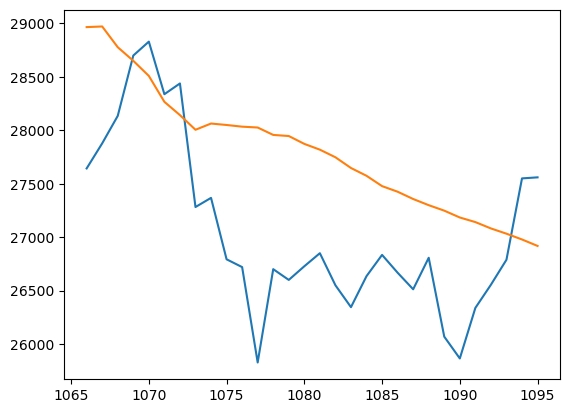

In [25]:
plt.plot(test_df[['value', 'AR_model_prediction']])

In [26]:
from sklearn.metrics import mean_absolute_error

print('MAE MA_model: ', mean_absolute_error(test_df['value'],
                                            test_df['AR_model_prediction']))


MAE MA_model:  872.131056506149


In [27]:
from sklearn.metrics import mean_squared_error
print('RMSE MA_model: ', mean_squared_error(test_df['value'],
                                            test_df['AR_model_prediction'])**0.5)

RMSE MA_model:  985.7667554814001
